In [3]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import networkx as nx

from synthetic_data import sample_precision, sample_timeseries, gen_synthetic_tseries

In [5]:
def plot_timeseries(ts, labels=None):
    num_series = ts.shape[1]
    
    # Normal tseries plot
    if True:
        fig, ax = plt.subplots(nrows=num_series, sharex=True, sharey=True, figsize=(8, 8))
        ax = ax.flatten()
        for i in range(num_series):
            ax[i].plot(ts[:,i])
            ax[i].grid()
            
        if labels is not None:
            uniq_labels = np.unique(labels)
            norm = colors.Normalize(vmin=0, vmax=max(uniq_labels))
            for lab in np.unique(labels):
                color = cm.Pastel1(norm(lab))
                for i in range(num_series):
                    ax[i].fill_between(
                        np.arange(0, ts.shape[0]),
                        -5, 5, 
                        where=labels==lab, 
                        facecolor=color,
                        alpha=0.7)

        ax[-1].set_xlabel("time")
        fig.tight_layout()
    
    # Heat map
    if False:
        fig, ax = plt.subplots()
        ax.matshow(ts.T, interpolation=None, aspect='auto')
        ax.set_xlabel("time")
        ax.set_ylabel("nodes")
        fig.tight_layout()

In [85]:
samples, labels, precisions = gen_synthetic_tseries(
    num_clusters=3,
    num_tsteps=100,
    sample_size=10,
    num_nodes=400,
    edge_prob=0.2)
samples = np.concatenate(samples, 1).T
labels = np.repeat(labels, 10)
for i, p in enumerate(precisions):
    print(i, ":")
    print(p)
    print()
    print(np.linalg.inv(p))
    print()

lambda min:  -12.439871109006358
num edges:  15959
lambda min:  -12.382132338494324
num edges:  15896
lambda min:  -12.518856830576972
num edges:  15948
0 :
[[12.53987111 -0.60495308  0.         ... -0.63369187  0.
   0.        ]
 [-0.60495308 12.53987111  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         12.53987111 ...  0.          0.
   0.        ]
 ...
 [-0.63369187  0.          0.         ... 12.53987111  0.
   0.68241561]
 [ 0.          0.          0.         ...  0.         12.53987111
   0.        ]
 [ 0.          0.          0.         ...  0.68241561  0.
  12.53987111]]

[[ 0.21096068  0.07845446 -0.01865736 ...  0.08465408 -0.00824409
  -0.0178966 ]
 [ 0.07845446  0.17709683 -0.00253025 ...  0.0615262  -0.01345405
  -0.01596539]
 [-0.01865736 -0.00253025  0.19252251 ... -0.05766786  0.00884376
   0.02654295]
 ...
 [ 0.08465408  0.0615262  -0.05766786 ...  0.26625865 -0.02976414
  -0.04710133]
 [-0.00824409 -0.01345405  0.00884376 ... -0.02976414  0.1260

<IPython.core.display.Javascript object>


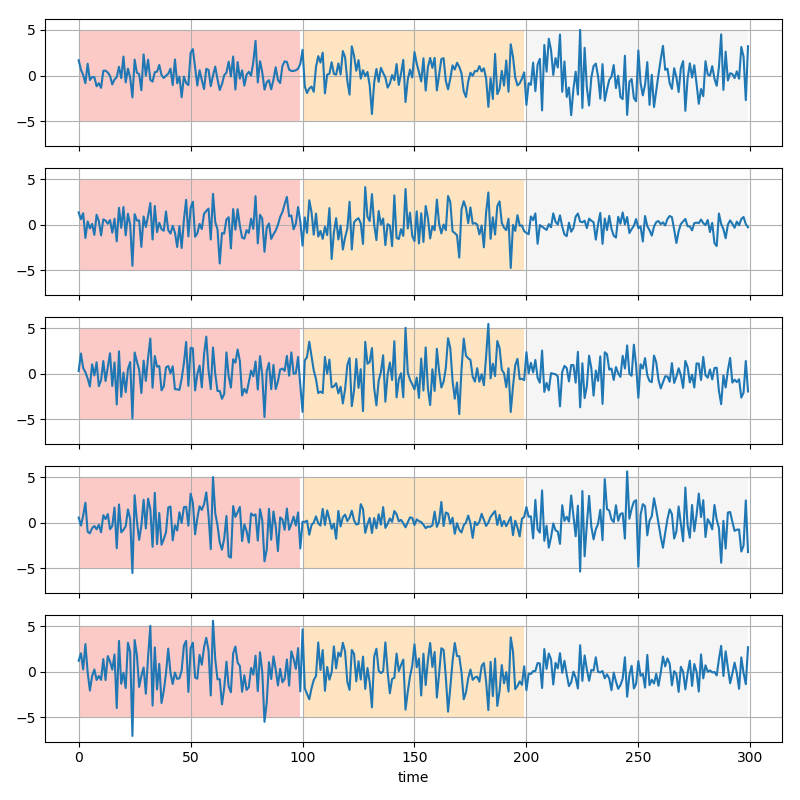

In [61]:
plot_timeseries(samples, labels)

# TICC 

### TICC succeeds at identifying the graphs

In [6]:
from TICC.TICC_solver import TICC

def ticc_cluster(subject, n_clusters, window_size, beta, plot=True):
    ticc = TICC(window_size=window_size, number_of_clusters=n_clusters,
                beta=beta, maxIters=100, threshold=2e-5, 
                write_out_file=False, num_proc=1)
    cluster_assignment, cluster_MRFs = ticc.fit(subject)
    if plot:
        fig, ax = plt.subplots()
        ax.plot(cluster_assignment)

    return cluster_MRFs

In [87]:
samples, labels, precisions = gen_synthetic_tseries(
    num_clusters=3,
    num_tsteps=100,
    sample_size=10,
    num_nodes=400,
    edge_prob=0.2)
samples = np.concatenate(samples, 1).T

graphs = ticc_cluster(samples, 3, 1, 10, plot=True)

[11-21 10:48:33] Starting TICC solver with params: 
	lambda_sparse 0.11
	switch_penalty 10
	num_cluster 3
	num stacked 1


[11-21 10:48:34] Iteration 0


Process ForkPoolWorker-7:
Traceback (most recent call last):
  File "/home/gmeanti/miniconda3/envs/ml/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/gmeanti/miniconda3/envs/ml/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/gmeanti/miniconda3/envs/ml/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/home/gmeanti/Dropbox/brain_gcn/src/brain-gcn-2/brain_project/nri/TICC/src/admm_solver.py", line 115, in __call__
    self.ADMM_z()
  File "/home/gmeanti/Dropbox/brain_gcn/src/brain-gcn-2/brain_project/nri/TICC/src/admm_solver.py", line 54, in ADMM_z
    locList = [((l+i)*self.sizeBlocks + j, l*self.sizeBlocks+k) for l in range(int(elems))]
  File "/home/gmeanti/Dropbox/brain_gcn/src/brain-gcn-2/brain_project/nri/TICC/src/admm_solver.py", line 54, in <listcomp>
    locList = [((l+i)*self.sizeBlocks + j, l*self.size

In [81]:
print(np.round(graphs[0], decimals=1))
print()
print(np.round(graphs[1], decimals=1))
print()
print(np.round(graphs[2], decimals=1))

[[ 1.1  0.   0.1 -0.  -0.5]
 [ 0.   0.9 -0.5  0.1  0. ]
 [ 0.1 -0.5  1.  -0.   0.5]
 [-0.   0.1 -0.   1.4 -0. ]
 [-0.5  0.   0.5 -0.   1. ]]

[[ 1.   0.   0.2  0.6 -0.4]
 [ 0.   1.2 -0.  -0.   0. ]
 [ 0.2 -0.   1.1 -0.5  0. ]
 [ 0.6 -0.  -0.5  1.1  0.1]
 [-0.4  0.   0.   0.1  1.2]]

[[ 1.  -0.4  0.  -0.  -0. ]
 [-0.4  1.  -0.4 -0.1 -0. ]
 [ 0.  -0.4  1.  -0.  -0.4]
 [-0.  -0.1 -0.   0.9 -0.6]
 [-0.  -0.  -0.4 -0.6  0.9]]


''

### TICC Scaling Experiment

We show with a small empirical experiment that TICC scales:
 - quadratically (or cubic? needs more data for this) in the input dimensionality.
 - linearly with the number of samples
 - quadratically in the number of clusters (or linear? needs more data, this is just the cluster update step which is in general short, so it's not a big problem)
On the positive side it converges very nicely with all but the smallest input dimensions (with reasonable number of clusters).

Runtime for 400-dimensional data is quite high!

In [30]:
from time import time

time_taken = []; time_taken_std = []
dimensionality = [3, 6, 9, 15, 20, 30, 50, 70, 90]

for d in dimensionality:
    samples, labels, precisions = gen_synthetic_tseries(
        num_clusters=3,
        num_tsteps=50,
        sample_size=10,
        num_nodes=d,
        edge_prob=0.2)
    samples = np.concatenate(samples, 1).T
    d_times = []
    for i in range(3):
        st = time()
        graphs = ticc_cluster(samples, 3, 1, 10, plot=False)
        d_times.append(time() - st)
    time_taken.append(np.mean(d_times))
    time_taken_std.append(np.std(d_times))

lambda min:  -0.6049530775073566
num edges:  1
lambda min:  0.0
num edges:  0
lambda min:  -0.8978306706191717
num edges:  1
[11-21 11:07:26] Starting TICC solver with params: 
	lambda_sparse 0.11
	switch_penalty 10
	num_cluster 3
	num stacked 1


[11-21 11:07:26] Iteration 0
[11-21 11:07:26] Finished ADMM for cluster 0
[11-21 11:07:26] Finished ADMM for cluster 1
[11-21 11:07:26] Finished ADMM for cluster 2
[11-21 11:07:26] Smoothing clusters (calculate log-likelihood).
[11-21 11:07:26] Updating cluster assignments
[11-21 11:07:26] Length of cluster 0: 17.000000
[11-21 11:07:26] Length of cluster 1: 28.000000
[11-21 11:07:26] Length of cluster 2: 105.000000






[11-21 11:07:26] Iteration 1
[11-21 11:07:26] Finished ADMM for cluster 0
[11-21 11:07:26] Finished ADMM for cluster 1
[11-21 11:07:26] Finished ADMM for cluster 2
[11-21 11:07:26] Smoothing clusters (calculate log-likelihood).
[11-21 11:07:26] Updating cluster assignments
[11-21 11:07:26] Length of cluster 0: 6.000000
[11-21

[11-21 11:07:28] Finished ADMM for cluster 0
[11-21 11:07:28] Finished ADMM for cluster 1
[11-21 11:07:28] Finished ADMM for cluster 2
[11-21 11:07:28] Smoothing clusters (calculate log-likelihood).
[11-21 11:07:28] Updating cluster assignments
[11-21 11:07:28] Length of cluster 0: 6.000000
[11-21 11:07:28] Length of cluster 1: 139.000000
[11-21 11:07:28] Length of cluster 2: 5.000000






[11-21 11:07:28] Iteration 3
[11-21 11:07:28] Finished ADMM for cluster 0
[11-21 11:07:28] Finished ADMM for cluster 1
[11-21 11:07:28] Finished ADMM for cluster 2
[11-21 11:07:28] Smoothing clusters (calculate log-likelihood).
[11-21 11:07:28] Updating cluster assignments
[11-21 11:07:28] Length of cluster 0: 6.000000
[11-21 11:07:28] Length of cluster 1: 139.000000
[11-21 11:07:28] Length of cluster 2: 5.000000




[11-21 11:07:28] Training converged, breaking early.
[11-21 11:07:28] Starting TICC solver with params: 
	lambda_sparse 0.11
	switch_penalty 10
	num_cluster 3
	num stacked 1


[11-21 11

[11-21 11:07:30] Finished ADMM for cluster 2
[11-21 11:07:30] Smoothing clusters (calculate log-likelihood).
[11-21 11:07:30] Updating cluster assignments
[11-21 11:07:30] Length of cluster 0: 101.000000
[11-21 11:07:30] Length of cluster 1: 42.000000
[11-21 11:07:30] Length of cluster 2: 7.000000




[11-21 11:07:30] Training converged, breaking early.
lambda min:  -2.2947869444218183
num edges:  23
lambda min:  -2.1047315017986867
num edges:  20
lambda min:  -1.9746678892833838
num edges:  20
[11-21 11:07:30] Starting TICC solver with params: 
	lambda_sparse 0.11
	switch_penalty 10
	num_cluster 3
	num stacked 1


[11-21 11:07:31] Iteration 0
[11-21 11:07:31] Finished ADMM for cluster 0
[11-21 11:07:31] Finished ADMM for cluster 1
[11-21 11:07:31] Finished ADMM for cluster 2
[11-21 11:07:31] Smoothing clusters (calculate log-likelihood).
[11-21 11:07:31] Updating cluster assignments
[11-21 11:07:31] Length of cluster 0: 9.000000
[11-21 11:07:31] Length of cluster 1: 53.000000
[11-21 1

[11-21 11:07:35] Finished ADMM for cluster 0
[11-21 11:07:35] Finished ADMM for cluster 1
[11-21 11:07:35] Finished ADMM for cluster 2
[11-21 11:07:35] Smoothing clusters (calculate log-likelihood).
[11-21 11:07:35] Updating cluster assignments
[11-21 11:07:35] Length of cluster 0: 50.000000
[11-21 11:07:35] Length of cluster 1: 50.000000
[11-21 11:07:35] Length of cluster 2: 50.000000






[11-21 11:07:35] Iteration 6
[11-21 11:07:35] Finished ADMM for cluster 0
[11-21 11:07:35] Finished ADMM for cluster 1
[11-21 11:07:35] Finished ADMM for cluster 2
[11-21 11:07:35] Smoothing clusters (calculate log-likelihood).
[11-21 11:07:35] Updating cluster assignments
[11-21 11:07:35] Length of cluster 0: 50.000000
[11-21 11:07:35] Length of cluster 1: 50.000000
[11-21 11:07:35] Length of cluster 2: 50.000000




[11-21 11:07:35] Training converged, breaking early.
[11-21 11:07:35] Starting TICC solver with params: 
	lambda_sparse 0.11
	switch_penalty 10
	num_cluster 3
	num stacked 1


[11-21 



[11-21 11:07:41] Iteration 0
[11-21 11:07:41] Finished ADMM for cluster 0
[11-21 11:07:41] Finished ADMM for cluster 1
[11-21 11:07:41] Finished ADMM for cluster 2
[11-21 11:07:41] Smoothing clusters (calculate log-likelihood).
[11-21 11:07:41] Updating cluster assignments
[11-21 11:07:41] Length of cluster 0: 45.000000
[11-21 11:07:41] Length of cluster 1: 69.000000
[11-21 11:07:41] Length of cluster 2: 36.000000






[11-21 11:07:41] Iteration 1
[11-21 11:07:41] Finished ADMM for cluster 0
[11-21 11:07:42] Finished ADMM for cluster 1
[11-21 11:07:42] Finished ADMM for cluster 2
[11-21 11:07:42] Smoothing clusters (calculate log-likelihood).
[11-21 11:07:42] Updating cluster assignments
[11-21 11:07:42] Length of cluster 0: 49.000000
[11-21 11:07:42] Length of cluster 1: 69.000000
[11-21 11:07:42] Length of cluster 2: 32.000000






[11-21 11:07:42] Iteration 2
[11-21 11:07:42] Finished ADMM for cluster 0
[11-21 11:07:42] Finished ADMM for cluster 1
[11-21 11:07:42] Finished ADMM 

[11-21 11:07:54] Finished ADMM for cluster 0
[11-21 11:07:54] Finished ADMM for cluster 1
[11-21 11:07:55] Finished ADMM for cluster 2
[11-21 11:07:55] Smoothing clusters (calculate log-likelihood).
[11-21 11:07:55] Updating cluster assignments
[11-21 11:07:55] Length of cluster 0: 50.000000
[11-21 11:07:55] Length of cluster 1: 52.000000
[11-21 11:07:55] Length of cluster 2: 48.000000






[11-21 11:07:55] Iteration 12
[11-21 11:07:55] Finished ADMM for cluster 0
[11-21 11:07:55] Finished ADMM for cluster 1
[11-21 11:07:55] Finished ADMM for cluster 2
[11-21 11:07:55] Smoothing clusters (calculate log-likelihood).
[11-21 11:07:55] Updating cluster assignments
[11-21 11:07:55] Length of cluster 0: 50.000000
[11-21 11:07:55] Length of cluster 1: 52.000000
[11-21 11:07:55] Length of cluster 2: 48.000000




[11-21 11:07:55] Training converged, breaking early.
lambda min:  -4.113982930781403
num edges:  247
lambda min:  -4.369846217034102
num edges:  236
lambda min:  -4.201043508188438
n

[11-21 11:08:33] Finished ADMM for cluster 1
[11-21 11:08:34] Finished ADMM for cluster 2
[11-21 11:08:34] Smoothing clusters (calculate log-likelihood).
[11-21 11:08:34] Updating cluster assignments
[11-21 11:08:34] Length of cluster 0: 44.000000
[11-21 11:08:34] Length of cluster 1: 49.000000
[11-21 11:08:34] Length of cluster 2: 57.000000






[11-21 11:08:34] Iteration 2
[11-21 11:08:35] Finished ADMM for cluster 0
[11-21 11:08:37] Finished ADMM for cluster 1
[11-21 11:08:38] Finished ADMM for cluster 2
[11-21 11:08:38] Smoothing clusters (calculate log-likelihood).
[11-21 11:08:38] Updating cluster assignments
[11-21 11:08:38] Length of cluster 0: 44.000000
[11-21 11:08:38] Length of cluster 1: 50.000000
[11-21 11:08:38] Length of cluster 2: 56.000000






[11-21 11:08:38] Iteration 3
[11-21 11:08:39] Finished ADMM for cluster 0
[11-21 11:08:41] Finished ADMM for cluster 1
[11-21 11:08:42] Finished ADMM for cluster 2
[11-21 11:08:42] Smoothing clusters (calculate log-likelihood)



[11-21 11:09:48] Iteration 0
[11-21 11:09:51] Finished ADMM for cluster 0
[11-21 11:09:53] Finished ADMM for cluster 1
[11-21 11:09:55] Finished ADMM for cluster 2
[11-21 11:09:55] Smoothing clusters (calculate log-likelihood).
[11-21 11:09:55] Updating cluster assignments
[11-21 11:09:55] Length of cluster 0: 13.000000
[11-21 11:09:55] Length of cluster 1: 55.000000
[11-21 11:09:55] Length of cluster 2: 82.000000






[11-21 11:09:55] Iteration 1
[11-21 11:09:58] Finished ADMM for cluster 0
[11-21 11:10:00] Finished ADMM for cluster 1
[11-21 11:10:02] Finished ADMM for cluster 2
[11-21 11:10:02] Smoothing clusters (calculate log-likelihood).
[11-21 11:10:02] Updating cluster assignments
[11-21 11:10:02] Length of cluster 0: 14.000000
[11-21 11:10:02] Length of cluster 1: 60.000000
[11-21 11:10:02] Length of cluster 2: 76.000000






[11-21 11:10:02] Iteration 2
[11-21 11:10:05] Finished ADMM for cluster 0
[11-21 11:10:07] Finished ADMM for cluster 1
[11-21 11:10:09] Finished ADMM 

<IPython.core.display.Javascript object>


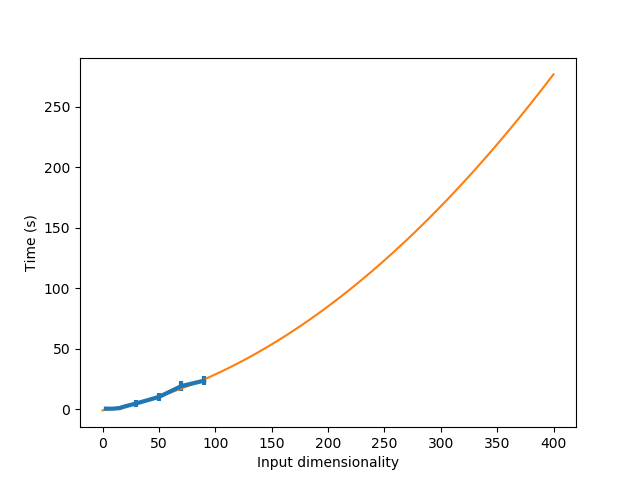

Poly Err [7.99419563]
Poly Coef [-0.89177205  0.16532529  0.00132358]


Text(0, 0.5, 'Time (s)')

In [31]:
fig, ax = plt.subplots()

max_x = max(dimensionality)

c, stats = np.polynomial.polynomial.polyfit(dimensionality, time_taken, deg=2, full=True)
print("Poly Err", stats[0])
print("Poly Coef", c)

ax.errorbar(dimensionality, time_taken, yerr=time_taken_std, linewidth=3)
ax.plot(np.arange(0, max_x, 0.1),
        np.polynomial.polynomial.polyval(np.arange(0, max_x, 0.1), c))
ax.set_xlabel("Input dimensionality")
ax.set_ylabel("Time (s)")

In [36]:
time_taken = []; time_taken_std = []
num_tsteps = [90, 150, 200, 300, 500, 1000, 2000, 4000, 8000]

for t in num_tsteps:
    samples, labels, precisions = gen_synthetic_tseries(
        num_clusters=3,
        num_tsteps=t,
        sample_size=10,
        num_nodes=15,
        edge_prob=0.2)
    samples = np.concatenate(samples, 1).T
    d_times = []
    for i in range(3):
        st = time()
        graphs = ticc_cluster(samples, 3, 1, 10, plot=False)
        d_times.append(time() - st)
    time_taken.append(np.mean(d_times))
    time_taken_std.append(np.std(d_times))

lambda min:  -1.48678052049536
num edges:  11
lambda min:  -1.8374015469106488
num edges:  11
lambda min:  -1.6991984661811828
num edges:  9
[11-21 11:13:41] Starting TICC solver with params: 
	lambda_sparse 0.11
	switch_penalty 10
	num_cluster 3
	num stacked 1


[11-21 11:13:41] Iteration 0
[11-21 11:13:42] Finished ADMM for cluster 0
[11-21 11:13:42] Finished ADMM for cluster 1
[11-21 11:13:42] Finished ADMM for cluster 2
[11-21 11:13:42] Smoothing clusters (calculate log-likelihood).
[11-21 11:13:42] Updating cluster assignments
[11-21 11:13:42] Cluster 2 has 0 samples
[11-21 11:13:42] Length of cluster 0: 157.000000
[11-21 11:13:42] Length of cluster 1: 93.000000
[11-21 11:13:42] Length of cluster 2: 20.000000






[11-21 11:13:42] Iteration 1
[11-21 11:13:42] Finished ADMM for cluster 0
[11-21 11:13:42] Finished ADMM for cluster 1
[11-21 11:13:42] Finished ADMM for cluster 2
[11-21 11:13:42] Smoothing clusters (calculate log-likelihood).
[11-21 11:13:42] Updating cluster assignme

[11-21 11:13:44] Finished ADMM for cluster 0
[11-21 11:13:44] Finished ADMM for cluster 1
[11-21 11:13:44] Finished ADMM for cluster 2
[11-21 11:13:44] Smoothing clusters (calculate log-likelihood).
[11-21 11:13:44] Updating cluster assignments
[11-21 11:13:44] Length of cluster 0: 300.000000
[11-21 11:13:44] Length of cluster 1: 32.000000
[11-21 11:13:44] Length of cluster 2: 118.000000




[11-21 11:13:44] Training converged, breaking early.
[11-21 11:13:44] Starting TICC solver with params: 
	lambda_sparse 0.11
	switch_penalty 10
	num_cluster 3
	num stacked 1


[11-21 11:13:44] Iteration 0
[11-21 11:13:44] Finished ADMM for cluster 0
[11-21 11:13:44] Finished ADMM for cluster 1
[11-21 11:13:44] Finished ADMM for cluster 2
[11-21 11:13:44] Smoothing clusters (calculate log-likelihood).
[11-21 11:13:44] Updating cluster assignments
[11-21 11:13:44] Length of cluster 0: 8.000000
[11-21 11:13:44] Length of cluster 1: 292.000000
[11-21 11:13:44] Length of cluster 2: 150.000000






[11-



[11-21 11:13:47] Iteration 0
[11-21 11:13:47] Finished ADMM for cluster 0
[11-21 11:13:47] Finished ADMM for cluster 1
[11-21 11:13:47] Finished ADMM for cluster 2
[11-21 11:13:47] Smoothing clusters (calculate log-likelihood).
[11-21 11:13:47] Updating cluster assignments
[11-21 11:13:47] Length of cluster 0: 220.000000
[11-21 11:13:47] Length of cluster 1: 380.000000
[11-21 11:13:47] Length of cluster 2: 300.000000






[11-21 11:13:47] Iteration 1
[11-21 11:13:47] Finished ADMM for cluster 0
[11-21 11:13:47] Finished ADMM for cluster 1
[11-21 11:13:47] Finished ADMM for cluster 2
[11-21 11:13:47] Smoothing clusters (calculate log-likelihood).
[11-21 11:13:47] Updating cluster assignments
[11-21 11:13:47] Length of cluster 0: 160.000000
[11-21 11:13:47] Length of cluster 1: 440.000000
[11-21 11:13:47] Length of cluster 2: 300.000000






[11-21 11:13:47] Iteration 2
[11-21 11:13:47] Finished ADMM for cluster 0
[11-21 11:13:48] Finished ADMM for cluster 1
[11-21 11:13:48] Finished



[11-21 11:13:51] Iteration 0
[11-21 11:13:51] Finished ADMM for cluster 0
[11-21 11:13:51] Finished ADMM for cluster 1
[11-21 11:13:51] Finished ADMM for cluster 2
[11-21 11:13:51] Smoothing clusters (calculate log-likelihood).
[11-21 11:13:51] Updating cluster assignments
[11-21 11:13:51] Length of cluster 0: 495.000000
[11-21 11:13:51] Length of cluster 1: 500.000000
[11-21 11:13:51] Length of cluster 2: 505.000000






[11-21 11:13:51] Iteration 1
[11-21 11:13:51] Finished ADMM for cluster 0
[11-21 11:13:51] Finished ADMM for cluster 1
[11-21 11:13:51] Finished ADMM for cluster 2
[11-21 11:13:51] Smoothing clusters (calculate log-likelihood).
[11-21 11:13:51] Updating cluster assignments
[11-21 11:13:51] Length of cluster 0: 495.000000
[11-21 11:13:51] Length of cluster 1: 500.000000
[11-21 11:13:51] Length of cluster 2: 505.000000




[11-21 11:13:51] Training converged, breaking early.
lambda min:  -1.48678052049536
num edges:  11
lambda min:  -1.8374015469106488
num edges:  11

[11-21 11:14:01] Length of cluster 0: 4000.000000
[11-21 11:14:01] Length of cluster 1: 4000.000000
[11-21 11:14:01] Length of cluster 2: 4000.000000




[11-21 11:14:01] Training converged, breaking early.
[11-21 11:14:01] Starting TICC solver with params: 
	lambda_sparse 0.11
	switch_penalty 10
	num_cluster 3
	num stacked 1


[11-21 11:14:02] Iteration 0
[11-21 11:14:02] Finished ADMM for cluster 0
[11-21 11:14:02] Finished ADMM for cluster 1
[11-21 11:14:02] Finished ADMM for cluster 2
[11-21 11:14:02] Smoothing clusters (calculate log-likelihood).
[11-21 11:14:02] Updating cluster assignments
[11-21 11:14:03] Length of cluster 0: 4000.000000
[11-21 11:14:03] Length of cluster 1: 4000.000000
[11-21 11:14:03] Length of cluster 2: 4000.000000






[11-21 11:14:03] Iteration 1
[11-21 11:14:03] Finished ADMM for cluster 0
[11-21 11:14:03] Finished ADMM for cluster 1
[11-21 11:14:03] Finished ADMM for cluster 2
[11-21 11:14:03] Smoothing clusters (calculate log-likelihood).
[11-21 11:14

<IPython.core.display.Javascript object>


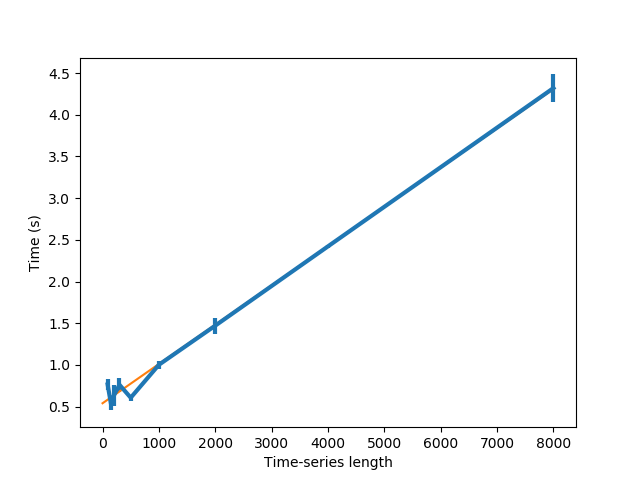

Poly Err [0.07555766]
Poly Coef [5.39199103e-01 4.71214675e-04]


Text(0, 0.5, 'Time (s)')

In [38]:
fig, ax = plt.subplots()

max_x = max(num_tsteps)

c, stats = np.polynomial.polynomial.polyfit(num_tsteps, time_taken, deg=1, full=True)
print("Poly Err", stats[0])
print("Poly Coef", c)

ax.errorbar(num_tsteps, time_taken, yerr=time_taken_std, linewidth=3)
ax.plot(np.arange(0, max_x, 0.1),
        np.polynomial.polynomial.polyval(np.arange(0, max_x, 0.1), c))
ax.set_xlabel("Time-series length")
ax.set_ylabel("Time (s)")

In [40]:
time_taken = []; time_taken_std = []
# For the number of clusters 2 factors affect performance:
# 1. The number of iterations: convergence is much harder with this amount of clusters
# 2. The `updating cluster assignments` step takes much longer than before!
num_clusters = [2, 3, 5, 10, 20, 40, 60]

for c in num_clusters:
    samples, labels, precisions = gen_synthetic_tseries(
        num_clusters=c,
        num_tsteps=200,
        sample_size=10,
        num_nodes=15,
        edge_prob=0.2)
    samples = np.concatenate(samples, 1).T
    d_times = []
    for i in range(3):
        st = time()
        graphs = ticc_cluster(samples, c, 1, 10, plot=False)
        d_times.append(time() - st)
    time_taken.append(np.mean(d_times))
    time_taken_std.append(np.std(d_times))

lambda min:  -2.2947869444218183
num edges:  23
lambda min:  -2.1047315017986867
num edges:  20
[11-21 11:16:29] Starting TICC solver with params: 
	lambda_sparse 0.11
	switch_penalty 10
	num_cluster 2
	num stacked 1


[11-21 11:16:29] Iteration 0
[11-21 11:16:30] Finished ADMM for cluster 0
[11-21 11:16:30] Finished ADMM for cluster 1
[11-21 11:16:30] Smoothing clusters (calculate log-likelihood).
[11-21 11:16:30] Updating cluster assignments
[11-21 11:16:30] Length of cluster 0: 200.000000
[11-21 11:16:30] Length of cluster 1: 200.000000






[11-21 11:16:30] Iteration 1
[11-21 11:16:30] Finished ADMM for cluster 0
[11-21 11:16:30] Finished ADMM for cluster 1
[11-21 11:16:30] Smoothing clusters (calculate log-likelihood).
[11-21 11:16:30] Updating cluster assignments
[11-21 11:16:30] Length of cluster 0: 200.000000
[11-21 11:16:30] Length of cluster 1: 200.000000




[11-21 11:16:30] Training converged, breaking early.
[11-21 11:16:30] Starting TICC solver with params: 
	lambda_spar

[11-21 11:16:33] Finished ADMM for cluster 0
[11-21 11:16:33] Finished ADMM for cluster 1
[11-21 11:16:33] Finished ADMM for cluster 2
[11-21 11:16:33] Smoothing clusters (calculate log-likelihood).
[11-21 11:16:33] Updating cluster assignments
[11-21 11:16:33] Length of cluster 0: 200.000000
[11-21 11:16:33] Length of cluster 1: 146.000000
[11-21 11:16:33] Length of cluster 2: 254.000000






[11-21 11:16:33] Iteration 3
[11-21 11:16:33] Finished ADMM for cluster 0
[11-21 11:16:33] Finished ADMM for cluster 1
[11-21 11:16:33] Finished ADMM for cluster 2
[11-21 11:16:33] Smoothing clusters (calculate log-likelihood).
[11-21 11:16:33] Updating cluster assignments
[11-21 11:16:33] Length of cluster 0: 201.000000
[11-21 11:16:33] Length of cluster 1: 199.000000
[11-21 11:16:33] Length of cluster 2: 200.000000






[11-21 11:16:33] Iteration 4
[11-21 11:16:33] Finished ADMM for cluster 0
[11-21 11:16:34] Finished ADMM for cluster 1
[11-21 11:16:34] Finished ADMM for cluster 2
[11-21 11:1

[11-21 11:16:38] Length of cluster 0: 204.000000
[11-21 11:16:38] Length of cluster 1: 381.000000
[11-21 11:16:38] Length of cluster 2: 70.000000
[11-21 11:16:38] Length of cluster 3: 126.000000
[11-21 11:16:38] Length of cluster 4: 219.000000






[11-21 11:16:38] Iteration 3
[11-21 11:16:38] Finished ADMM for cluster 0
[11-21 11:16:38] Finished ADMM for cluster 1
[11-21 11:16:38] Finished ADMM for cluster 2
[11-21 11:16:38] Finished ADMM for cluster 3
[11-21 11:16:38] Finished ADMM for cluster 4
[11-21 11:16:38] Smoothing clusters (calculate log-likelihood).
[11-21 11:16:38] Updating cluster assignments
[11-21 11:16:38] Length of cluster 0: 204.000000
[11-21 11:16:38] Length of cluster 1: 400.000000
[11-21 11:16:38] Length of cluster 2: 69.000000
[11-21 11:16:38] Length of cluster 3: 127.000000
[11-21 11:16:38] Length of cluster 4: 200.000000






[11-21 11:16:38] Iteration 4
[11-21 11:16:38] Finished ADMM for cluster 0
[11-21 11:16:38] Finished ADMM for cluster 1
[11-21 11:16:38] 

[11-21 11:16:44] Finished ADMM for cluster 3
[11-21 11:16:44] Finished ADMM for cluster 4
[11-21 11:16:44] Finished ADMM for cluster 5
[11-21 11:16:44] Finished ADMM for cluster 6
[11-21 11:16:44] Finished ADMM for cluster 7
[11-21 11:16:44] Finished ADMM for cluster 8
[11-21 11:16:44] Finished ADMM for cluster 9
[11-21 11:16:44] Smoothing clusters (calculate log-likelihood).
[11-21 11:16:44] Updating cluster assignments
[11-21 11:16:44] Length of cluster 0: 202.000000
[11-21 11:16:44] Length of cluster 1: 200.000000
[11-21 11:16:44] Length of cluster 2: 198.000000
[11-21 11:16:44] Length of cluster 3: 200.000000
[11-21 11:16:44] Length of cluster 4: 201.000000
[11-21 11:16:44] Length of cluster 5: 200.000000
[11-21 11:16:44] Length of cluster 6: 200.000000
[11-21 11:16:44] Length of cluster 7: 199.000000
[11-21 11:16:44] Length of cluster 8: 200.000000
[11-21 11:16:44] Length of cluster 9: 200.000000






[11-21 11:16:44] Iteration 7
[11-21 11:16:44] Finished ADMM for cluster 0
[11-2

[11-21 11:16:53] Finished ADMM for cluster 4
[11-21 11:16:53] Finished ADMM for cluster 5
[11-21 11:16:53] Finished ADMM for cluster 6
[11-21 11:16:53] Finished ADMM for cluster 7
[11-21 11:16:53] Finished ADMM for cluster 8
[11-21 11:16:53] Finished ADMM for cluster 9
[11-21 11:16:53] Smoothing clusters (calculate log-likelihood).
[11-21 11:16:53] Updating cluster assignments
[11-21 11:16:53] Length of cluster 0: 323.000000
[11-21 11:16:53] Length of cluster 1: 401.000000
[11-21 11:16:53] Length of cluster 2: 200.000000
[11-21 11:16:53] Length of cluster 3: 398.000000
[11-21 11:16:53] Length of cluster 4: 2.000000
[11-21 11:16:53] Length of cluster 5: 202.000000
[11-21 11:16:53] Length of cluster 6: 18.000000
[11-21 11:16:53] Length of cluster 7: 198.000000
[11-21 11:16:53] Length of cluster 8: 199.000000
[11-21 11:16:53] Length of cluster 9: 59.000000






[11-21 11:16:53] Iteration 7
[11-21 11:16:53] Finished ADMM for cluster 0
[11-21 11:16:53] Finished ADMM for cluster 1
[11-21 11

[11-21 11:17:01] Finished ADMM for cluster 2
[11-21 11:17:01] Finished ADMM for cluster 3
[11-21 11:17:01] Finished ADMM for cluster 4
[11-21 11:17:01] Finished ADMM for cluster 5
[11-21 11:17:01] Finished ADMM for cluster 6
[11-21 11:17:02] Finished ADMM for cluster 7
[11-21 11:17:02] Finished ADMM for cluster 8
[11-21 11:17:02] Finished ADMM for cluster 9
[11-21 11:17:02] Smoothing clusters (calculate log-likelihood).
[11-21 11:17:02] Updating cluster assignments
[11-21 11:17:02] Length of cluster 0: 17.000000
[11-21 11:17:02] Length of cluster 1: 384.000000
[11-21 11:17:02] Length of cluster 2: 204.000000
[11-21 11:17:02] Length of cluster 3: 368.000000
[11-21 11:17:02] Length of cluster 4: 22.000000
[11-21 11:17:02] Length of cluster 5: 203.000000
[11-21 11:17:02] Length of cluster 6: 575.000000
[11-21 11:17:02] Length of cluster 7: 27.000000
[11-21 11:17:02] Length of cluster 8: 64.000000
[11-21 11:17:02] Length of cluster 9: 136.000000






[11-21 11:17:02] Iteration 6
[11-21 11

[11-21 11:17:11] Length of cluster 0: 195.000000
[11-21 11:17:11] Length of cluster 1: 220.000000
[11-21 11:17:11] Length of cluster 2: 372.000000
[11-21 11:17:11] Length of cluster 3: 286.000000
[11-21 11:17:11] Length of cluster 4: 204.000000
[11-21 11:17:11] Length of cluster 5: 200.000000
[11-21 11:17:11] Length of cluster 6: 384.000000
[11-21 11:17:11] Length of cluster 7: 344.000000
[11-21 11:17:11] Length of cluster 8: 28.000000
[11-21 11:17:11] Length of cluster 9: 410.000000
[11-21 11:17:11] Length of cluster 10: 201.000000
[11-21 11:17:11] Length of cluster 11: 224.000000
[11-21 11:17:11] Length of cluster 12: 180.000000
[11-21 11:17:11] Length of cluster 13: 14.000000
[11-21 11:17:11] Length of cluster 14: 221.000000
[11-21 11:17:11] Length of cluster 15: 13.000000
[11-21 11:17:11] Length of cluster 16: 64.000000
[11-21 11:17:11] Length of cluster 17: 102.000000
[11-21 11:17:11] Length of cluster 18: 136.000000
[11-21 11:17:11] Length of cluster 19: 202.000000






[11-21 1

[11-21 11:17:19] Length of cluster 19: 200.000000






[11-21 11:17:19] Iteration 6
[11-21 11:17:19] Finished ADMM for cluster 0
[11-21 11:17:19] Finished ADMM for cluster 1
[11-21 11:17:19] Finished ADMM for cluster 2
[11-21 11:17:19] Finished ADMM for cluster 3
[11-21 11:17:19] Finished ADMM for cluster 4
[11-21 11:17:19] Finished ADMM for cluster 5
[11-21 11:17:19] Finished ADMM for cluster 6
[11-21 11:17:19] Finished ADMM for cluster 7
[11-21 11:17:19] Finished ADMM for cluster 8
[11-21 11:17:19] Finished ADMM for cluster 9
[11-21 11:17:19] Finished ADMM for cluster 10
[11-21 11:17:19] Finished ADMM for cluster 11
[11-21 11:17:19] Finished ADMM for cluster 12
[11-21 11:17:19] Finished ADMM for cluster 13
[11-21 11:17:19] Finished ADMM for cluster 14
[11-21 11:17:19] Finished ADMM for cluster 15
[11-21 11:17:19] Finished ADMM for cluster 16
[11-21 11:17:19] Finished ADMM for cluster 17
[11-21 11:17:19] Finished ADMM for cluster 18
[11-21 11:17:19] Finished ADMM for cluster 19
[11-2

[11-21 11:17:28] Finished ADMM for cluster 0
[11-21 11:17:28] Finished ADMM for cluster 1
[11-21 11:17:28] Finished ADMM for cluster 2
[11-21 11:17:28] Finished ADMM for cluster 3
[11-21 11:17:29] Finished ADMM for cluster 4
[11-21 11:17:29] Finished ADMM for cluster 5
[11-21 11:17:29] Finished ADMM for cluster 6
[11-21 11:17:29] Finished ADMM for cluster 7
[11-21 11:17:29] Finished ADMM for cluster 8
[11-21 11:17:29] Finished ADMM for cluster 9
[11-21 11:17:29] Finished ADMM for cluster 10
[11-21 11:17:29] Finished ADMM for cluster 11
[11-21 11:17:29] Finished ADMM for cluster 12
[11-21 11:17:29] Finished ADMM for cluster 13
[11-21 11:17:29] Finished ADMM for cluster 14
[11-21 11:17:29] Finished ADMM for cluster 15
[11-21 11:17:29] Finished ADMM for cluster 16
[11-21 11:17:29] Finished ADMM for cluster 17
[11-21 11:17:29] Finished ADMM for cluster 18
[11-21 11:17:29] Finished ADMM for cluster 19
[11-21 11:17:29] Smoothing clusters (calculate log-likelihood).
[11-21 11:17:29] Updating 

[11-21 11:17:36] Finished ADMM for cluster 4
[11-21 11:17:36] Finished ADMM for cluster 5
[11-21 11:17:36] Finished ADMM for cluster 6
[11-21 11:17:36] Finished ADMM for cluster 7
[11-21 11:17:36] Finished ADMM for cluster 8
[11-21 11:17:36] Finished ADMM for cluster 9
[11-21 11:17:36] Finished ADMM for cluster 10
[11-21 11:17:36] Finished ADMM for cluster 11
[11-21 11:17:36] Finished ADMM for cluster 12
[11-21 11:17:36] Finished ADMM for cluster 13
[11-21 11:17:36] Finished ADMM for cluster 14
[11-21 11:17:36] Finished ADMM for cluster 15
[11-21 11:17:36] Finished ADMM for cluster 16
[11-21 11:17:36] Finished ADMM for cluster 17
[11-21 11:17:36] Finished ADMM for cluster 18
[11-21 11:17:36] Finished ADMM for cluster 19
[11-21 11:17:36] Smoothing clusters (calculate log-likelihood).
[11-21 11:17:36] Updating cluster assignments
[11-21 11:17:37] Length of cluster 0: 389.000000
[11-21 11:17:37] Length of cluster 1: 373.000000
[11-21 11:17:37] Length of cluster 2: 197.000000
[11-21 11:17:

[11-21 11:17:45] Finished ADMM for cluster 5
[11-21 11:17:45] Finished ADMM for cluster 6
[11-21 11:17:45] Finished ADMM for cluster 7
[11-21 11:17:45] Finished ADMM for cluster 8
[11-21 11:17:45] Finished ADMM for cluster 9
[11-21 11:17:46] Finished ADMM for cluster 10
[11-21 11:17:46] Finished ADMM for cluster 11
[11-21 11:17:46] Finished ADMM for cluster 12
[11-21 11:17:46] Finished ADMM for cluster 13
[11-21 11:17:46] Finished ADMM for cluster 14
[11-21 11:17:46] Finished ADMM for cluster 15
[11-21 11:17:46] Finished ADMM for cluster 16
[11-21 11:17:46] Finished ADMM for cluster 17
[11-21 11:17:46] Finished ADMM for cluster 18
[11-21 11:17:46] Finished ADMM for cluster 19
[11-21 11:17:46] Smoothing clusters (calculate log-likelihood).
[11-21 11:17:46] Updating cluster assignments
[11-21 11:17:47] Length of cluster 0: 181.000000
[11-21 11:17:47] Length of cluster 1: 160.000000
[11-21 11:17:47] Length of cluster 2: 201.000000
[11-21 11:17:47] Length of cluster 3: 208.000000
[11-21 11

lambda min:  (-1.7997355335778997+0j)
num edges:  18
lambda min:  -1.9043831712405388
num edges:  22
lambda min:  -2.012798303432313
num edges:  24
lambda min:  -1.8910343220429782
num edges:  23
lambda min:  -1.7572706665907902
num edges:  17
lambda min:  -2.5536855827027765
num edges:  24
lambda min:  -1.9078674174714587
num edges:  18
lambda min:  -2.1218441151561085
num edges:  23
lambda min:  -2.44170326375308
num edges:  24
lambda min:  -2.350556503231299
num edges:  24
lambda min:  (-1.7489898129058434+0j)
num edges:  15
lambda min:  -2.4930540439735696
num edges:  25
lambda min:  -1.9674917993886236
num edges:  15
lambda min:  -2.0583998989280494
num edges:  22
[11-21 11:17:53] Starting TICC solver with params: 
	lambda_sparse 0.11
	switch_penalty 10
	num_cluster 40
	num stacked 1


[11-21 11:18:03] Iteration 0
[11-21 11:18:03] Finished ADMM for cluster 0
[11-21 11:18:03] Finished ADMM for cluster 1
[11-21 11:18:03] Finished ADMM for cluster 2
[11-21 11:18:03] Finished ADMM for

[11-21 11:18:15] Finished ADMM for cluster 0
[11-21 11:18:15] Finished ADMM for cluster 1
[11-21 11:18:15] Finished ADMM for cluster 2
[11-21 11:18:15] Finished ADMM for cluster 3
[11-21 11:18:15] Finished ADMM for cluster 4
[11-21 11:18:15] Finished ADMM for cluster 5
[11-21 11:18:15] Finished ADMM for cluster 6
[11-21 11:18:15] Finished ADMM for cluster 7
[11-21 11:18:15] Finished ADMM for cluster 8
[11-21 11:18:15] Finished ADMM for cluster 9
[11-21 11:18:15] Finished ADMM for cluster 10
[11-21 11:18:15] Finished ADMM for cluster 11
[11-21 11:18:15] Finished ADMM for cluster 12
[11-21 11:18:15] Finished ADMM for cluster 13
[11-21 11:18:15] Finished ADMM for cluster 14
[11-21 11:18:15] Finished ADMM for cluster 15
[11-21 11:18:15] Finished ADMM for cluster 16
[11-21 11:18:15] Finished ADMM for cluster 17
[11-21 11:18:15] Finished ADMM for cluster 18
[11-21 11:18:15] Finished ADMM for cluster 19
[11-21 11:18:15] Finished ADMM for cluster 20
[11-21 11:18:15] Finished ADMM for cluster 2

[11-21 11:18:26] Finished ADMM for cluster 11
[11-21 11:18:26] Finished ADMM for cluster 12
[11-21 11:18:26] Finished ADMM for cluster 13
[11-21 11:18:26] Finished ADMM for cluster 14
[11-21 11:18:26] Finished ADMM for cluster 15
[11-21 11:18:26] Finished ADMM for cluster 16
[11-21 11:18:26] Finished ADMM for cluster 17
[11-21 11:18:26] Finished ADMM for cluster 18
[11-21 11:18:26] Finished ADMM for cluster 19
[11-21 11:18:26] Finished ADMM for cluster 20
[11-21 11:18:26] Finished ADMM for cluster 21
[11-21 11:18:26] Finished ADMM for cluster 22
[11-21 11:18:26] Finished ADMM for cluster 23
[11-21 11:18:27] Finished ADMM for cluster 24
[11-21 11:18:27] Finished ADMM for cluster 25
[11-21 11:18:27] Finished ADMM for cluster 26
[11-21 11:18:27] Finished ADMM for cluster 27
[11-21 11:18:27] Finished ADMM for cluster 28
[11-21 11:18:27] Finished ADMM for cluster 29
[11-21 11:18:27] Finished ADMM for cluster 30
[11-21 11:18:27] Finished ADMM for cluster 31
[11-21 11:18:27] Finished ADMM for

[11-21 11:18:37] Finished ADMM for cluster 23
[11-21 11:18:38] Finished ADMM for cluster 24
[11-21 11:18:38] Finished ADMM for cluster 25
[11-21 11:18:38] Finished ADMM for cluster 26
[11-21 11:18:38] Finished ADMM for cluster 27
[11-21 11:18:38] Finished ADMM for cluster 28
[11-21 11:18:38] Finished ADMM for cluster 29
[11-21 11:18:38] Finished ADMM for cluster 30
[11-21 11:18:38] Finished ADMM for cluster 31
[11-21 11:18:38] Finished ADMM for cluster 32
[11-21 11:18:38] Finished ADMM for cluster 33
[11-21 11:18:38] Finished ADMM for cluster 34
[11-21 11:18:38] Finished ADMM for cluster 35
[11-21 11:18:38] Finished ADMM for cluster 36
[11-21 11:18:38] Finished ADMM for cluster 37
[11-21 11:18:38] Finished ADMM for cluster 38
[11-21 11:18:38] Finished ADMM for cluster 39
[11-21 11:18:38] Smoothing clusters (calculate log-likelihood).
[11-21 11:18:38] Updating cluster assignments
[11-21 11:18:41] Length of cluster 0: 200.000000
[11-21 11:18:41] Length of cluster 1: 200.000000
[11-21 11:

[11-21 11:18:51] Finished ADMM for cluster 33
[11-21 11:18:51] Finished ADMM for cluster 34
[11-21 11:18:51] Finished ADMM for cluster 35
[11-21 11:18:51] Finished ADMM for cluster 36
[11-21 11:18:51] Finished ADMM for cluster 37
[11-21 11:18:51] Finished ADMM for cluster 38
[11-21 11:18:51] Finished ADMM for cluster 39
[11-21 11:18:51] Smoothing clusters (calculate log-likelihood).
[11-21 11:18:51] Updating cluster assignments
[11-21 11:18:54] Length of cluster 0: 200.000000
[11-21 11:18:54] Length of cluster 1: 200.000000
[11-21 11:18:54] Length of cluster 2: 201.000000
[11-21 11:18:54] Length of cluster 3: 197.000000
[11-21 11:18:54] Length of cluster 4: 63.000000
[11-21 11:18:54] Length of cluster 5: 31.000000
[11-21 11:18:54] Length of cluster 6: 190.000000
[11-21 11:18:54] Length of cluster 7: 203.000000
[11-21 11:18:54] Length of cluster 8: 396.000000
[11-21 11:18:54] Length of cluster 9: 396.000000
[11-21 11:18:54] Length of cluster 10: 31.000000
[11-21 11:18:54] Length of clus

[11-21 11:19:02] Updating cluster assignments
[11-21 11:19:05] Length of cluster 0: 200.000000
[11-21 11:19:05] Length of cluster 1: 200.000000
[11-21 11:19:05] Length of cluster 2: 201.000000
[11-21 11:19:05] Length of cluster 3: 197.000000
[11-21 11:19:05] Length of cluster 4: 63.000000
[11-21 11:19:05] Length of cluster 5: 31.000000
[11-21 11:19:05] Length of cluster 6: 190.000000
[11-21 11:19:05] Length of cluster 7: 200.000000
[11-21 11:19:05] Length of cluster 8: 396.000000
[11-21 11:19:05] Length of cluster 9: 396.000000
[11-21 11:19:05] Length of cluster 10: 31.000000
[11-21 11:19:05] Length of cluster 11: 202.000000
[11-21 11:19:05] Length of cluster 12: 200.000000
[11-21 11:19:05] Length of cluster 13: 200.000000
[11-21 11:19:05] Length of cluster 14: 395.000000
[11-21 11:19:06] Length of cluster 15: 200.000000
[11-21 11:19:06] Length of cluster 16: 193.000000
[11-21 11:19:06] Length of cluster 17: 201.000000
[11-21 11:19:06] Length of cluster 18: 194.000000
[11-21 11:19:06] 

[11-21 11:19:27] Length of cluster 11: 179.000000
[11-21 11:19:27] Length of cluster 12: 396.000000
[11-21 11:19:27] Length of cluster 13: 201.000000
[11-21 11:19:27] Length of cluster 14: 209.000000
[11-21 11:19:27] Length of cluster 15: 27.000000
[11-21 11:19:27] Length of cluster 16: 6.000000
[11-21 11:19:27] Length of cluster 17: 402.000000
[11-21 11:19:27] Length of cluster 18: 58.000000
[11-21 11:19:27] Length of cluster 19: 315.000000
[11-21 11:19:27] Length of cluster 20: 369.000000
[11-21 11:19:27] Length of cluster 21: 207.000000
[11-21 11:19:27] Length of cluster 22: 297.000000
[11-21 11:19:27] Length of cluster 23: 141.000000
[11-21 11:19:28] Length of cluster 24: 13.000000
[11-21 11:19:28] Length of cluster 25: 201.000000
[11-21 11:19:28] Length of cluster 26: 26.000000
[11-21 11:19:28] Length of cluster 27: 392.000000
[11-21 11:19:28] Length of cluster 28: 200.000000
[11-21 11:19:28] Length of cluster 29: 104.000000
[11-21 11:19:28] Length of cluster 30: 200.000000
[11-21

[11-21 11:19:38] Length of cluster 23: 125.000000
[11-21 11:19:38] Length of cluster 24: 13.000000
[11-21 11:19:38] Length of cluster 25: 200.000000
[11-21 11:19:38] Length of cluster 26: 56.000000
[11-21 11:19:38] Length of cluster 27: 392.000000
[11-21 11:19:38] Length of cluster 28: 200.000000
[11-21 11:19:38] Length of cluster 29: 200.000000
[11-21 11:19:39] Length of cluster 30: 200.000000
[11-21 11:19:39] Length of cluster 31: 200.000000
[11-21 11:19:39] Length of cluster 32: 200.000000
[11-21 11:19:39] Length of cluster 33: 202.000000
[11-21 11:19:39] Length of cluster 34: 202.000000
[11-21 11:19:39] Length of cluster 35: 74.000000
[11-21 11:19:39] Length of cluster 36: 218.000000
[11-21 11:19:39] Length of cluster 37: 200.000000
[11-21 11:19:39] Length of cluster 38: 399.000000
[11-21 11:19:39] Length of cluster 39: 391.000000






[11-21 11:19:39] Iteration 4
[11-21 11:19:39] Finished ADMM for cluster 0
[11-21 11:19:39] Finished ADMM for cluster 1
[11-21 11:19:39] Finished AD

[11-21 11:19:51] Length of cluster 35: 74.000000
[11-21 11:19:51] Length of cluster 36: 202.000000
[11-21 11:19:51] Length of cluster 37: 200.000000
[11-21 11:19:51] Length of cluster 38: 398.000000
[11-21 11:19:51] Length of cluster 39: 392.000000






[11-21 11:19:51] Iteration 6
[11-21 11:19:51] Finished ADMM for cluster 0
[11-21 11:19:51] Finished ADMM for cluster 1
[11-21 11:19:51] Finished ADMM for cluster 2
[11-21 11:19:51] Finished ADMM for cluster 3
[11-21 11:19:51] Finished ADMM for cluster 4
[11-21 11:19:51] Finished ADMM for cluster 5
[11-21 11:19:51] Finished ADMM for cluster 6
[11-21 11:19:51] Finished ADMM for cluster 7
[11-21 11:19:51] Finished ADMM for cluster 8
[11-21 11:19:51] Finished ADMM for cluster 9
[11-21 11:19:51] Finished ADMM for cluster 10
[11-21 11:19:51] Finished ADMM for cluster 11
[11-21 11:19:51] Finished ADMM for cluster 12
[11-21 11:19:51] Finished ADMM for cluster 13
[11-21 11:19:51] Finished ADMM for cluster 14
[11-21 11:19:51] Finished ADMM for c

[11-21 11:20:02] Finished ADMM for cluster 1
[11-21 11:20:03] Finished ADMM for cluster 2
[11-21 11:20:03] Finished ADMM for cluster 3
[11-21 11:20:03] Finished ADMM for cluster 4
[11-21 11:20:03] Finished ADMM for cluster 5
[11-21 11:20:03] Finished ADMM for cluster 6
[11-21 11:20:03] Finished ADMM for cluster 7
[11-21 11:20:03] Finished ADMM for cluster 8
[11-21 11:20:03] Finished ADMM for cluster 9
[11-21 11:20:03] Finished ADMM for cluster 10
[11-21 11:20:03] Finished ADMM for cluster 11
[11-21 11:20:03] Finished ADMM for cluster 12
[11-21 11:20:03] Finished ADMM for cluster 13
[11-21 11:20:03] Finished ADMM for cluster 14
[11-21 11:20:03] Finished ADMM for cluster 15
[11-21 11:20:03] Finished ADMM for cluster 16
[11-21 11:20:03] Finished ADMM for cluster 17
[11-21 11:20:03] Finished ADMM for cluster 18
[11-21 11:20:03] Finished ADMM for cluster 19
[11-21 11:20:03] Finished ADMM for cluster 20
[11-21 11:20:03] Finished ADMM for cluster 21
[11-21 11:20:04] Finished ADMM for cluster 

[11-21 11:20:14] Finished ADMM for cluster 10
[11-21 11:20:14] Finished ADMM for cluster 11
[11-21 11:20:14] Finished ADMM for cluster 12
[11-21 11:20:14] Finished ADMM for cluster 13
[11-21 11:20:14] Finished ADMM for cluster 14
[11-21 11:20:14] Finished ADMM for cluster 15
[11-21 11:20:14] Finished ADMM for cluster 16
[11-21 11:20:14] Finished ADMM for cluster 17
[11-21 11:20:14] Finished ADMM for cluster 18
[11-21 11:20:14] Finished ADMM for cluster 19
[11-21 11:20:14] Finished ADMM for cluster 20
[11-21 11:20:14] Finished ADMM for cluster 21
[11-21 11:20:14] Finished ADMM for cluster 22
[11-21 11:20:14] Finished ADMM for cluster 23
[11-21 11:20:14] Finished ADMM for cluster 24
[11-21 11:20:14] Finished ADMM for cluster 25
[11-21 11:20:14] Finished ADMM for cluster 26
[11-21 11:20:14] Finished ADMM for cluster 27
[11-21 11:20:14] Finished ADMM for cluster 28
[11-21 11:20:14] Finished ADMM for cluster 29
[11-21 11:20:14] Finished ADMM for cluster 30
[11-21 11:20:14] Finished ADMM for

[11-21 11:20:32] Finished ADMM for cluster 18
[11-21 11:20:32] Finished ADMM for cluster 19
[11-21 11:20:32] Finished ADMM for cluster 20
[11-21 11:20:32] Finished ADMM for cluster 21
[11-21 11:20:32] Finished ADMM for cluster 22
[11-21 11:20:32] Finished ADMM for cluster 23
[11-21 11:20:32] Finished ADMM for cluster 24
[11-21 11:20:32] Finished ADMM for cluster 25
[11-21 11:20:32] Finished ADMM for cluster 26
[11-21 11:20:32] Finished ADMM for cluster 27
[11-21 11:20:32] Finished ADMM for cluster 28
[11-21 11:20:32] Finished ADMM for cluster 29
[11-21 11:20:32] Finished ADMM for cluster 30
[11-21 11:20:32] Finished ADMM for cluster 31
[11-21 11:20:32] Finished ADMM for cluster 32
[11-21 11:20:32] Finished ADMM for cluster 33
[11-21 11:20:32] Finished ADMM for cluster 34
[11-21 11:20:32] Finished ADMM for cluster 35
[11-21 11:20:32] Finished ADMM for cluster 36
[11-21 11:20:32] Finished ADMM for cluster 37
[11-21 11:20:32] Finished ADMM for cluster 38
[11-21 11:20:32] Finished ADMM for

[11-21 11:20:42] Finished ADMM for cluster 27
[11-21 11:20:42] Finished ADMM for cluster 28
[11-21 11:20:42] Finished ADMM for cluster 29
[11-21 11:20:42] Finished ADMM for cluster 30
[11-21 11:20:42] Finished ADMM for cluster 31
[11-21 11:20:42] Finished ADMM for cluster 32
[11-21 11:20:42] Finished ADMM for cluster 33
[11-21 11:20:43] Finished ADMM for cluster 34
[11-21 11:20:43] Finished ADMM for cluster 35
[11-21 11:20:43] Finished ADMM for cluster 36
[11-21 11:20:43] Finished ADMM for cluster 37
[11-21 11:20:43] Finished ADMM for cluster 38
[11-21 11:20:43] Finished ADMM for cluster 39
[11-21 11:20:43] Smoothing clusters (calculate log-likelihood).
[11-21 11:20:43] Updating cluster assignments
[11-21 11:20:46] Length of cluster 0: 36.000000
[11-21 11:20:46] Length of cluster 1: 201.000000
[11-21 11:20:46] Length of cluster 2: 82.000000
[11-21 11:20:46] Length of cluster 3: 385.000000
[11-21 11:20:46] Length of cluster 4: 203.000000
[11-21 11:20:46] Length of cluster 5: 200.000000


[11-21 11:20:53] Finished ADMM for cluster 34
[11-21 11:20:53] Finished ADMM for cluster 35
[11-21 11:20:53] Finished ADMM for cluster 36
[11-21 11:20:53] Finished ADMM for cluster 37
[11-21 11:20:54] Finished ADMM for cluster 38
[11-21 11:20:54] Finished ADMM for cluster 39
[11-21 11:20:54] Smoothing clusters (calculate log-likelihood).
[11-21 11:20:54] Updating cluster assignments
[11-21 11:20:56] Length of cluster 0: 93.000000
[11-21 11:20:56] Length of cluster 1: 200.000000
[11-21 11:20:56] Length of cluster 2: 134.000000
[11-21 11:20:57] Length of cluster 3: 379.000000
[11-21 11:20:57] Length of cluster 4: 201.000000
[11-21 11:20:57] Length of cluster 5: 200.000000
[11-21 11:20:57] Length of cluster 6: 80.000000
[11-21 11:20:57] Length of cluster 7: 200.000000
[11-21 11:20:57] Length of cluster 8: 200.000000
[11-21 11:20:57] Length of cluster 9: 307.000000
[11-21 11:20:57] Length of cluster 10: 396.000000
[11-21 11:20:57] Length of cluster 11: 207.000000
[11-21 11:20:57] Length of

[11-21 11:21:05] Updating cluster assignments
[11-21 11:21:08] Length of cluster 0: 200.000000
[11-21 11:21:08] Length of cluster 1: 200.000000
[11-21 11:21:08] Length of cluster 2: 200.000000
[11-21 11:21:08] Length of cluster 3: 380.000000
[11-21 11:21:08] Length of cluster 4: 200.000000
[11-21 11:21:08] Length of cluster 5: 200.000000
[11-21 11:21:08] Length of cluster 6: 191.000000
[11-21 11:21:08] Length of cluster 7: 200.000000
[11-21 11:21:08] Length of cluster 8: 200.000000
[11-21 11:21:08] Length of cluster 9: 200.000000
[11-21 11:21:08] Length of cluster 10: 396.000000
[11-21 11:21:08] Length of cluster 11: 203.000000
[11-21 11:21:08] Length of cluster 12: 200.000000
[11-21 11:21:08] Length of cluster 13: 200.000000
[11-21 11:21:09] Length of cluster 14: 198.000000
[11-21 11:21:09] Length of cluster 15: 200.000000
[11-21 11:21:09] Length of cluster 16: 202.000000
[11-21 11:21:09] Length of cluster 17: 200.000000
[11-21 11:21:09] Length of cluster 18: 202.000000
[11-21 11:21:0



[11-21 11:21:40] Iteration 0
[11-21 11:21:40] Finished ADMM for cluster 0
[11-21 11:21:40] Finished ADMM for cluster 1
[11-21 11:21:40] Finished ADMM for cluster 2
[11-21 11:21:40] Finished ADMM for cluster 3
[11-21 11:21:40] Finished ADMM for cluster 4
[11-21 11:21:40] Finished ADMM for cluster 5
[11-21 11:21:40] Finished ADMM for cluster 6
[11-21 11:21:40] Finished ADMM for cluster 7
[11-21 11:21:40] Finished ADMM for cluster 8
[11-21 11:21:40] Finished ADMM for cluster 9
[11-21 11:21:40] Finished ADMM for cluster 10
[11-21 11:21:40] Finished ADMM for cluster 11
[11-21 11:21:40] Finished ADMM for cluster 12
[11-21 11:21:41] Finished ADMM for cluster 13
[11-21 11:21:41] Finished ADMM for cluster 14
[11-21 11:21:41] Finished ADMM for cluster 15
[11-21 11:21:41] Finished ADMM for cluster 16
[11-21 11:21:41] Finished ADMM for cluster 17
[11-21 11:21:41] Finished ADMM for cluster 18
[11-21 11:21:41] Finished ADMM for cluster 19
[11-21 11:21:41] Finished ADMM for cluster 20
[11-21 11:21:

[11-21 11:21:52] Finished ADMM for cluster 54
[11-21 11:21:52] Finished ADMM for cluster 55
[11-21 11:21:52] Finished ADMM for cluster 56
[11-21 11:21:52] Finished ADMM for cluster 57
[11-21 11:21:52] Finished ADMM for cluster 58
[11-21 11:21:52] Finished ADMM for cluster 59
[11-21 11:21:52] Smoothing clusters (calculate log-likelihood).
[11-21 11:21:52] Updating cluster assignments
[11-21 11:21:58] Length of cluster 0: 355.000000
[11-21 11:21:58] Length of cluster 1: 201.000000
[11-21 11:21:58] Length of cluster 2: 427.000000
[11-21 11:21:59] Length of cluster 3: 308.000000
[11-21 11:21:59] Length of cluster 4: 194.000000
[11-21 11:21:59] Length of cluster 5: 208.000000
[11-21 11:21:59] Length of cluster 6: 227.000000
[11-21 11:21:59] Length of cluster 7: 80.000000
[11-21 11:21:59] Length of cluster 8: 23.000000
[11-21 11:21:59] Length of cluster 9: 208.000000
[11-21 11:21:59] Length of cluster 10: 45.000000
[11-21 11:21:59] Length of cluster 11: 243.000000
[11-21 11:21:59] Length of 

[11-21 11:22:10] Length of cluster 52: 342.000000
[11-21 11:22:10] Length of cluster 53: 52.000000
[11-21 11:22:10] Length of cluster 54: 30.000000
[11-21 11:22:10] Length of cluster 55: 214.000000
[11-21 11:22:10] Length of cluster 56: 211.000000
[11-21 11:22:11] Length of cluster 57: 413.000000
[11-21 11:22:11] Length of cluster 58: 200.000000
[11-21 11:22:11] Length of cluster 59: 164.000000






[11-21 11:22:11] Iteration 3
[11-21 11:22:11] Finished ADMM for cluster 0
[11-21 11:22:11] Finished ADMM for cluster 1
[11-21 11:22:11] Finished ADMM for cluster 2
[11-21 11:22:11] Finished ADMM for cluster 3
[11-21 11:22:11] Finished ADMM for cluster 4
[11-21 11:22:11] Finished ADMM for cluster 5
[11-21 11:22:11] Finished ADMM for cluster 6
[11-21 11:22:11] Finished ADMM for cluster 7
[11-21 11:22:11] Finished ADMM for cluster 8
[11-21 11:22:11] Finished ADMM for cluster 9
[11-21 11:22:11] Finished ADMM for cluster 10
[11-21 11:22:11] Finished ADMM for cluster 11
[11-21 11:22:11] Finished

[11-21 11:22:23] Finished ADMM for cluster 42
[11-21 11:22:23] Finished ADMM for cluster 43
[11-21 11:22:23] Finished ADMM for cluster 44
[11-21 11:22:23] Finished ADMM for cluster 45
[11-21 11:22:23] Finished ADMM for cluster 46
[11-21 11:22:23] Finished ADMM for cluster 47
[11-21 11:22:23] Finished ADMM for cluster 48
[11-21 11:22:23] Finished ADMM for cluster 49
[11-21 11:22:23] Finished ADMM for cluster 50
[11-21 11:22:23] Finished ADMM for cluster 51
[11-21 11:22:23] Finished ADMM for cluster 52
[11-21 11:22:23] Finished ADMM for cluster 53
[11-21 11:22:23] Finished ADMM for cluster 54
[11-21 11:22:23] Finished ADMM for cluster 55
[11-21 11:22:23] Finished ADMM for cluster 56
[11-21 11:22:23] Finished ADMM for cluster 57
[11-21 11:22:23] Finished ADMM for cluster 58
[11-21 11:22:23] Finished ADMM for cluster 59
[11-21 11:22:23] Smoothing clusters (calculate log-likelihood).
[11-21 11:22:24] Updating cluster assignments
[11-21 11:22:30] Length of cluster 0: 398.000000
[11-21 11:22:

[11-21 11:22:42] Length of cluster 34: 181.000000
[11-21 11:22:42] Length of cluster 35: 192.000000
[11-21 11:22:42] Length of cluster 36: 397.000000
[11-21 11:22:42] Length of cluster 37: 40.000000
[11-21 11:22:42] Length of cluster 38: 200.000000
[11-21 11:22:42] Length of cluster 39: 200.000000
[11-21 11:22:42] Length of cluster 40: 146.000000
[11-21 11:22:42] Length of cluster 41: 200.000000
[11-21 11:22:42] Length of cluster 42: 2.000000
[11-21 11:22:42] Length of cluster 43: 201.000000
[11-21 11:22:42] Length of cluster 44: 203.000000
[11-21 11:22:42] Length of cluster 45: 200.000000
[11-21 11:22:42] Length of cluster 46: 400.000000
[11-21 11:22:42] Length of cluster 47: 201.000000
[11-21 11:22:42] Length of cluster 48: 79.000000
[11-21 11:22:42] Length of cluster 49: 49.000000
[11-21 11:22:42] Length of cluster 50: 185.000000
[11-21 11:22:42] Length of cluster 51: 35.000000
[11-21 11:22:42] Length of cluster 52: 199.000000
[11-21 11:22:42] Length of cluster 53: 188.000000
[11-21

[11-21 11:22:55] Finished ADMM for cluster 24
[11-21 11:22:55] Finished ADMM for cluster 25
[11-21 11:22:55] Finished ADMM for cluster 26
[11-21 11:22:55] Finished ADMM for cluster 27
[11-21 11:22:55] Finished ADMM for cluster 28
[11-21 11:22:55] Finished ADMM for cluster 29
[11-21 11:22:56] Finished ADMM for cluster 30
[11-21 11:22:56] Finished ADMM for cluster 31
[11-21 11:22:56] Finished ADMM for cluster 32
[11-21 11:22:56] Finished ADMM for cluster 33
[11-21 11:22:56] Finished ADMM for cluster 34
[11-21 11:22:56] Finished ADMM for cluster 35
[11-21 11:22:56] Finished ADMM for cluster 36
[11-21 11:22:56] Finished ADMM for cluster 37
[11-21 11:22:56] Finished ADMM for cluster 38
[11-21 11:22:56] Finished ADMM for cluster 39
[11-21 11:22:56] Finished ADMM for cluster 40
[11-21 11:22:56] Finished ADMM for cluster 41
[11-21 11:22:56] Finished ADMM for cluster 42
[11-21 11:22:56] Finished ADMM for cluster 43
[11-21 11:22:57] Finished ADMM for cluster 44
[11-21 11:22:57] Finished ADMM for

[11-21 11:23:16] Length of cluster 20: 396.000000
[11-21 11:23:16] Length of cluster 21: 201.000000
[11-21 11:23:16] Length of cluster 22: 200.000000
[11-21 11:23:16] Length of cluster 23: 195.000000
[11-21 11:23:16] Length of cluster 24: 200.000000
[11-21 11:23:16] Length of cluster 25: 201.000000
[11-21 11:23:16] Length of cluster 26: 23.000000
[11-21 11:23:16] Length of cluster 27: 200.000000
[11-21 11:23:16] Length of cluster 28: 366.000000
[11-21 11:23:17] Length of cluster 29: 200.000000
[11-21 11:23:17] Length of cluster 30: 13.000000
[11-21 11:23:17] Length of cluster 31: 200.000000
[11-21 11:23:17] Length of cluster 32: 209.000000
[11-21 11:23:17] Length of cluster 33: 200.000000
[11-21 11:23:17] Length of cluster 34: 180.000000
[11-21 11:23:17] Length of cluster 35: 192.000000
[11-21 11:23:17] Length of cluster 36: 397.000000
[11-21 11:23:17] Length of cluster 37: 34.000000
[11-21 11:23:17] Length of cluster 38: 200.000000
[11-21 11:23:17] Length of cluster 39: 200.000000
[11

[11-21 11:23:47] Finished ADMM for cluster 4
[11-21 11:23:47] Finished ADMM for cluster 5
[11-21 11:23:47] Finished ADMM for cluster 6
[11-21 11:23:47] Finished ADMM for cluster 7
[11-21 11:23:47] Finished ADMM for cluster 8
[11-21 11:23:47] Finished ADMM for cluster 9
[11-21 11:23:47] Finished ADMM for cluster 10
[11-21 11:23:47] Finished ADMM for cluster 11
[11-21 11:23:48] Finished ADMM for cluster 12
[11-21 11:23:48] Finished ADMM for cluster 13
[11-21 11:23:48] Finished ADMM for cluster 14
[11-21 11:23:48] Finished ADMM for cluster 15
[11-21 11:23:48] Finished ADMM for cluster 16
[11-21 11:23:48] Finished ADMM for cluster 17
[11-21 11:23:48] Finished ADMM for cluster 18
[11-21 11:23:48] Finished ADMM for cluster 19
[11-21 11:23:48] Finished ADMM for cluster 20
[11-21 11:23:48] Finished ADMM for cluster 21
[11-21 11:23:48] Finished ADMM for cluster 22
[11-21 11:23:48] Finished ADMM for cluster 23
[11-21 11:23:48] Finished ADMM for cluster 24
[11-21 11:23:48] Finished ADMM for clust

[11-21 11:23:59] Finished ADMM for cluster 57
[11-21 11:23:59] Finished ADMM for cluster 58
[11-21 11:23:59] Finished ADMM for cluster 59
[11-21 11:23:59] Smoothing clusters (calculate log-likelihood).
[11-21 11:23:59] Updating cluster assignments
[11-21 11:24:06] Length of cluster 0: 81.000000
[11-21 11:24:06] Length of cluster 1: 214.000000
[11-21 11:24:06] Length of cluster 2: 515.000000
[11-21 11:24:06] Length of cluster 3: 205.000000
[11-21 11:24:06] Length of cluster 4: 62.000000
[11-21 11:24:06] Length of cluster 5: 200.000000
[11-21 11:24:06] Length of cluster 6: 61.000000
[11-21 11:24:06] Length of cluster 7: 349.000000
[11-21 11:24:06] Length of cluster 8: 10.000000
[11-21 11:24:06] Length of cluster 9: 91.000000
[11-21 11:24:06] Length of cluster 10: 235.000000
[11-21 11:24:06] Length of cluster 11: 403.000000
[11-21 11:24:06] Length of cluster 12: 391.000000
[11-21 11:24:06] Length of cluster 13: 374.000000
[11-21 11:24:06] Length of cluster 14: 77.000000
[11-21 11:24:06] L

[11-21 11:24:18] Length of cluster 47: 242.000000
[11-21 11:24:18] Length of cluster 48: 44.000000
[11-21 11:24:18] Length of cluster 49: 212.000000
[11-21 11:24:18] Length of cluster 50: 389.000000
[11-21 11:24:18] Length of cluster 51: 201.000000
[11-21 11:24:18] Length of cluster 52: 496.000000
[11-21 11:24:18] Length of cluster 53: 399.000000
[11-21 11:24:18] Length of cluster 54: 202.000000
[11-21 11:24:18] Length of cluster 55: 130.000000
[11-21 11:24:18] Length of cluster 56: 137.000000
[11-21 11:24:18] Length of cluster 57: 180.000000
[11-21 11:24:18] Length of cluster 58: 205.000000
[11-21 11:24:18] Length of cluster 59: 384.000000






[11-21 11:24:18] Iteration 3
[11-21 11:24:18] Finished ADMM for cluster 0
[11-21 11:24:18] Finished ADMM for cluster 1
[11-21 11:24:18] Finished ADMM for cluster 2
[11-21 11:24:18] Finished ADMM for cluster 3
[11-21 11:24:18] Finished ADMM for cluster 4
[11-21 11:24:19] Finished ADMM for cluster 5
[11-21 11:24:19] Finished ADMM for cluster 6
[

[11-21 11:24:31] Finished ADMM for cluster 36
[11-21 11:24:31] Finished ADMM for cluster 37
[11-21 11:24:31] Finished ADMM for cluster 38
[11-21 11:24:31] Finished ADMM for cluster 39
[11-21 11:24:31] Finished ADMM for cluster 40
[11-21 11:24:31] Finished ADMM for cluster 41
[11-21 11:24:31] Finished ADMM for cluster 42
[11-21 11:24:31] Finished ADMM for cluster 43
[11-21 11:24:31] Finished ADMM for cluster 44
[11-21 11:24:31] Finished ADMM for cluster 45
[11-21 11:24:31] Finished ADMM for cluster 46
[11-21 11:24:31] Finished ADMM for cluster 47
[11-21 11:24:31] Finished ADMM for cluster 48
[11-21 11:24:31] Finished ADMM for cluster 49
[11-21 11:24:31] Finished ADMM for cluster 50
[11-21 11:24:31] Finished ADMM for cluster 51
[11-21 11:24:31] Finished ADMM for cluster 52
[11-21 11:24:31] Finished ADMM for cluster 53
[11-21 11:24:31] Finished ADMM for cluster 54
[11-21 11:24:31] Finished ADMM for cluster 55
[11-21 11:24:32] Finished ADMM for cluster 56
[11-21 11:24:32] Finished ADMM for

[11-21 11:24:50] Length of cluster 37: 12.000000
[11-21 11:24:50] Length of cluster 38: 201.000000
[11-21 11:24:50] Length of cluster 39: 200.000000
[11-21 11:24:50] Length of cluster 40: 91.000000
[11-21 11:24:50] Length of cluster 41: 200.000000
[11-21 11:24:51] Length of cluster 42: 200.000000
[11-21 11:24:51] Length of cluster 43: 202.000000
[11-21 11:24:51] Length of cluster 44: 201.000000
[11-21 11:24:51] Length of cluster 45: 364.000000
[11-21 11:24:51] Length of cluster 46: 381.000000
[11-21 11:24:51] Length of cluster 47: 191.000000
[11-21 11:24:51] Length of cluster 48: 17.000000
[11-21 11:24:51] Length of cluster 49: 199.000000
[11-21 11:24:51] Length of cluster 50: 390.000000
[11-21 11:24:51] Length of cluster 51: 200.000000
[11-21 11:24:51] Length of cluster 52: 199.000000
[11-21 11:24:51] Length of cluster 53: 385.000000
[11-21 11:24:51] Length of cluster 54: 202.000000
[11-21 11:24:51] Length of cluster 55: 200.000000
[11-21 11:24:51] Length of cluster 56: 137.000000
[11

[11-21 11:25:04] Finished ADMM for cluster 26
[11-21 11:25:04] Finished ADMM for cluster 27
[11-21 11:25:04] Finished ADMM for cluster 28
[11-21 11:25:05] Finished ADMM for cluster 29
[11-21 11:25:05] Finished ADMM for cluster 30
[11-21 11:25:05] Finished ADMM for cluster 31
[11-21 11:25:05] Finished ADMM for cluster 32
[11-21 11:25:05] Finished ADMM for cluster 33
[11-21 11:25:05] Finished ADMM for cluster 34
[11-21 11:25:05] Finished ADMM for cluster 35
[11-21 11:25:05] Finished ADMM for cluster 36
[11-21 11:25:05] Finished ADMM for cluster 37
[11-21 11:25:05] Finished ADMM for cluster 38
[11-21 11:25:05] Finished ADMM for cluster 39
[11-21 11:25:05] Finished ADMM for cluster 40
[11-21 11:25:05] Finished ADMM for cluster 41
[11-21 11:25:05] Finished ADMM for cluster 42
[11-21 11:25:05] Finished ADMM for cluster 43
[11-21 11:25:05] Finished ADMM for cluster 44
[11-21 11:25:05] Finished ADMM for cluster 45
[11-21 11:25:05] Finished ADMM for cluster 46
[11-21 11:25:05] Finished ADMM for

[11-21 11:25:24] Length of cluster 18: 194.000000
[11-21 11:25:24] Length of cluster 19: 398.000000
[11-21 11:25:24] Length of cluster 20: 199.000000
[11-21 11:25:24] Length of cluster 21: 109.000000
[11-21 11:25:24] Length of cluster 22: 197.000000
[11-21 11:25:24] Length of cluster 23: 200.000000
[11-21 11:25:24] Length of cluster 24: 208.000000
[11-21 11:25:24] Length of cluster 25: 183.000000
[11-21 11:25:24] Length of cluster 26: 200.000000
[11-21 11:25:24] Length of cluster 27: 201.000000
[11-21 11:25:24] Length of cluster 28: 42.000000
[11-21 11:25:24] Length of cluster 29: 8.000000
[11-21 11:25:24] Length of cluster 30: 200.000000
[11-21 11:25:24] Length of cluster 31: 201.000000
[11-21 11:25:24] Length of cluster 32: 400.000000
[11-21 11:25:24] Length of cluster 33: 32.000000
[11-21 11:25:24] Length of cluster 34: 200.000000
[11-21 11:25:24] Length of cluster 35: 191.000000
[11-21 11:25:24] Length of cluster 36: 203.000000
[11-21 11:25:24] Length of cluster 37: 12.000000
[11-2

[11-21 11:25:56] Finished ADMM for cluster 4
[11-21 11:25:56] Finished ADMM for cluster 5
[11-21 11:25:57] Finished ADMM for cluster 6
[11-21 11:25:57] Finished ADMM for cluster 7
[11-21 11:25:57] Finished ADMM for cluster 8
[11-21 11:25:57] Finished ADMM for cluster 9
[11-21 11:25:57] Finished ADMM for cluster 10
[11-21 11:25:57] Finished ADMM for cluster 11
[11-21 11:25:57] Finished ADMM for cluster 12
[11-21 11:25:57] Finished ADMM for cluster 13
[11-21 11:25:57] Finished ADMM for cluster 14
[11-21 11:25:57] Finished ADMM for cluster 15
[11-21 11:25:57] Finished ADMM for cluster 16
[11-21 11:25:57] Finished ADMM for cluster 17
[11-21 11:25:57] Finished ADMM for cluster 18
[11-21 11:25:57] Finished ADMM for cluster 19
[11-21 11:25:57] Finished ADMM for cluster 20
[11-21 11:25:57] Finished ADMM for cluster 21
[11-21 11:25:57] Finished ADMM for cluster 22
[11-21 11:25:57] Finished ADMM for cluster 23
[11-21 11:25:57] Finished ADMM for cluster 24
[11-21 11:25:57] Finished ADMM for clust

[11-21 11:26:08] Updating cluster assignments
[11-21 11:26:15] Length of cluster 0: 156.000000
[11-21 11:26:15] Length of cluster 1: 311.000000
[11-21 11:26:15] Length of cluster 2: 184.000000
[11-21 11:26:15] Length of cluster 3: 133.000000
[11-21 11:26:15] Length of cluster 4: 261.000000
[11-21 11:26:15] Length of cluster 5: 201.000000
[11-21 11:26:15] Length of cluster 6: 217.000000
[11-21 11:26:15] Length of cluster 7: 200.000000
[11-21 11:26:15] Length of cluster 8: 118.000000
[11-21 11:26:15] Length of cluster 9: 153.000000
[11-21 11:26:15] Length of cluster 10: 186.000000
[11-21 11:26:15] Length of cluster 11: 105.000000
[11-21 11:26:15] Length of cluster 12: 277.000000
[11-21 11:26:15] Length of cluster 13: 391.000000
[11-21 11:26:15] Length of cluster 14: 44.000000
[11-21 11:26:15] Length of cluster 15: 171.000000
[11-21 11:26:15] Length of cluster 16: 74.000000
[11-21 11:26:15] Length of cluster 17: 30.000000
[11-21 11:26:15] Length of cluster 18: 96.000000
[11-21 11:26:15] L

[11-21 11:26:27] Length of cluster 59: 91.000000






[11-21 11:26:27] Iteration 3
[11-21 11:26:27] Finished ADMM for cluster 0
[11-21 11:26:27] Finished ADMM for cluster 1
[11-21 11:26:27] Finished ADMM for cluster 2
[11-21 11:26:27] Finished ADMM for cluster 3
[11-21 11:26:27] Finished ADMM for cluster 4
[11-21 11:26:27] Finished ADMM for cluster 5
[11-21 11:26:27] Finished ADMM for cluster 6
[11-21 11:26:27] Finished ADMM for cluster 7
[11-21 11:26:27] Finished ADMM for cluster 8
[11-21 11:26:27] Finished ADMM for cluster 9
[11-21 11:26:27] Finished ADMM for cluster 10
[11-21 11:26:27] Finished ADMM for cluster 11
[11-21 11:26:27] Finished ADMM for cluster 12
[11-21 11:26:27] Finished ADMM for cluster 13
[11-21 11:26:27] Finished ADMM for cluster 14
[11-21 11:26:28] Finished ADMM for cluster 15
[11-21 11:26:28] Finished ADMM for cluster 16
[11-21 11:26:28] Finished ADMM for cluster 17
[11-21 11:26:28] Finished ADMM for cluster 18
[11-21 11:26:28] Finished ADMM for cluster 19
[11-21

[11-21 11:26:40] Finished ADMM for cluster 51
[11-21 11:26:40] Finished ADMM for cluster 52
[11-21 11:26:40] Finished ADMM for cluster 53
[11-21 11:26:40] Finished ADMM for cluster 54
[11-21 11:26:40] Finished ADMM for cluster 55
[11-21 11:26:40] Finished ADMM for cluster 56
[11-21 11:26:40] Finished ADMM for cluster 57
[11-21 11:26:40] Finished ADMM for cluster 58
[11-21 11:26:40] Finished ADMM for cluster 59
[11-21 11:26:40] Smoothing clusters (calculate log-likelihood).
[11-21 11:26:40] Updating cluster assignments
[11-21 11:26:46] Length of cluster 0: 200.000000
[11-21 11:26:47] Length of cluster 1: 377.000000
[11-21 11:26:47] Length of cluster 2: 330.000000
[11-21 11:26:47] Length of cluster 3: 200.000000
[11-21 11:26:47] Length of cluster 4: 195.000000
[11-21 11:26:47] Length of cluster 5: 195.000000
[11-21 11:26:47] Length of cluster 6: 198.000000
[11-21 11:26:47] Length of cluster 7: 200.000000
[11-21 11:26:47] Length of cluster 8: 191.000000
[11-21 11:26:47] Length of cluster 

[11-21 11:26:59] Length of cluster 41: 22.000000
[11-21 11:26:59] Length of cluster 42: 200.000000
[11-21 11:26:59] Length of cluster 43: 203.000000
[11-21 11:26:59] Length of cluster 44: 193.000000
[11-21 11:26:59] Length of cluster 45: 209.000000
[11-21 11:26:59] Length of cluster 46: 400.000000
[11-21 11:26:59] Length of cluster 47: 200.000000
[11-21 11:26:59] Length of cluster 48: 400.000000
[11-21 11:26:59] Length of cluster 49: 200.000000
[11-21 11:26:59] Length of cluster 50: 37.000000
[11-21 11:26:59] Length of cluster 51: 21.000000
[11-21 11:26:59] Length of cluster 52: 392.000000
[11-21 11:26:59] Length of cluster 53: 398.000000
[11-21 11:26:59] Length of cluster 54: 151.000000
[11-21 11:26:59] Length of cluster 55: 200.000000
[11-21 11:26:59] Length of cluster 56: 200.000000
[11-21 11:26:59] Length of cluster 57: 23.000000
[11-21 11:26:59] Length of cluster 58: 199.000000
[11-21 11:26:59] Length of cluster 59: 56.000000






[11-21 11:26:59] Iteration 6
[11-21 11:27:00] Fin

[11-21 11:27:13] Finished ADMM for cluster 32
[11-21 11:27:13] Finished ADMM for cluster 33
[11-21 11:27:13] Finished ADMM for cluster 34
[11-21 11:27:13] Finished ADMM for cluster 35
[11-21 11:27:13] Finished ADMM for cluster 36
[11-21 11:27:13] Finished ADMM for cluster 37
[11-21 11:27:13] Finished ADMM for cluster 38
[11-21 11:27:13] Finished ADMM for cluster 39
[11-21 11:27:13] Finished ADMM for cluster 40
[11-21 11:27:13] Finished ADMM for cluster 41
[11-21 11:27:13] Finished ADMM for cluster 42
[11-21 11:27:13] Finished ADMM for cluster 43
[11-21 11:27:13] Finished ADMM for cluster 44
[11-21 11:27:13] Finished ADMM for cluster 45
[11-21 11:27:13] Finished ADMM for cluster 46
[11-21 11:27:13] Finished ADMM for cluster 47
[11-21 11:27:13] Finished ADMM for cluster 48
[11-21 11:27:13] Finished ADMM for cluster 49
[11-21 11:27:13] Finished ADMM for cluster 50
[11-21 11:27:14] Finished ADMM for cluster 51
[11-21 11:27:14] Finished ADMM for cluster 52
[11-21 11:27:14] Finished ADMM for

[11-21 11:27:33] Length of cluster 31: 42.000000
[11-21 11:27:33] Length of cluster 32: 199.000000
[11-21 11:27:33] Length of cluster 33: 200.000000
[11-21 11:27:33] Length of cluster 34: 398.000000
[11-21 11:27:33] Length of cluster 35: 200.000000
[11-21 11:27:33] Length of cluster 36: 200.000000
[11-21 11:27:33] Length of cluster 37: 186.000000
[11-21 11:27:33] Length of cluster 38: 28.000000
[11-21 11:27:33] Length of cluster 39: 192.000000
[11-21 11:27:33] Length of cluster 40: 400.000000
[11-21 11:27:33] Length of cluster 41: 177.000000
[11-21 11:27:33] Length of cluster 42: 200.000000
[11-21 11:27:33] Length of cluster 43: 203.000000
[11-21 11:27:33] Length of cluster 44: 197.000000
[11-21 11:27:33] Length of cluster 45: 200.000000
[11-21 11:27:33] Length of cluster 46: 400.000000
[11-21 11:27:33] Length of cluster 47: 200.000000
[11-21 11:27:33] Length of cluster 48: 401.000000
[11-21 11:27:33] Length of cluster 49: 200.000000
[11-21 11:27:33] Length of cluster 50: 37.000000
[11

[11-21 11:27:45] Finished ADMM for cluster 21
[11-21 11:27:45] Finished ADMM for cluster 22
[11-21 11:27:45] Finished ADMM for cluster 23
[11-21 11:27:46] Finished ADMM for cluster 24
[11-21 11:27:46] Finished ADMM for cluster 25
[11-21 11:27:46] Finished ADMM for cluster 26
[11-21 11:27:46] Finished ADMM for cluster 27
[11-21 11:27:46] Finished ADMM for cluster 28
[11-21 11:27:46] Finished ADMM for cluster 29
[11-21 11:27:46] Finished ADMM for cluster 30
[11-21 11:27:46] Finished ADMM for cluster 31
[11-21 11:27:46] Finished ADMM for cluster 32
[11-21 11:27:46] Finished ADMM for cluster 33
[11-21 11:27:46] Finished ADMM for cluster 34
[11-21 11:27:46] Finished ADMM for cluster 35
[11-21 11:27:46] Finished ADMM for cluster 36
[11-21 11:27:46] Finished ADMM for cluster 37
[11-21 11:27:46] Finished ADMM for cluster 38
[11-21 11:27:46] Finished ADMM for cluster 39
[11-21 11:27:46] Finished ADMM for cluster 40
[11-21 11:27:46] Finished ADMM for cluster 41
[11-21 11:27:46] Finished ADMM for

<IPython.core.display.Javascript object>


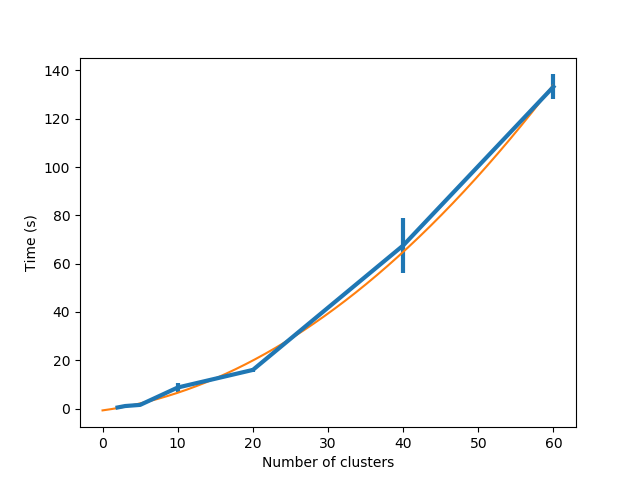

Poly Err [28.28448243]
Poly Coef [-0.74069753  0.42679727  0.03033395]


Text(0, 0.5, 'Time (s)')

In [45]:
fig, ax = plt.subplots()

max_x = max(num_clusters)

c, stats = np.polynomial.polynomial.polyfit(num_clusters, time_taken, deg=2, full=True)
print("Poly Err", stats[0])
print("Poly Coef", c)

ax.errorbar(num_clusters, time_taken, yerr=time_taken_std, linewidth=3)
ax.plot(np.arange(0, max_x, 0.1),
        np.polynomial.polynomial.polyval(np.arange(0, max_x, 0.1), c))
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Time (s)")

In [294]:
from synthetic_data import sample_precision

lambda min:  -0.7329678915991843
num edges:  4
lambda min:  -0.8249452636962042
num edges:  3
lambda min:  -0.9003826114825761
num edges:  3


<IPython.core.display.Javascript object>


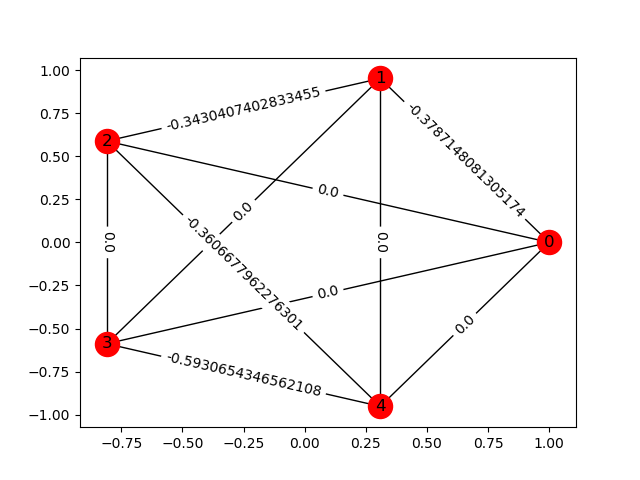

<IPython.core.display.Javascript object>


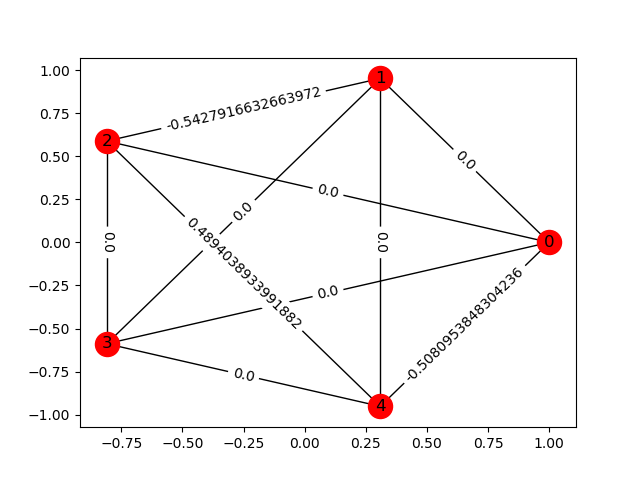

<IPython.core.display.Javascript object>


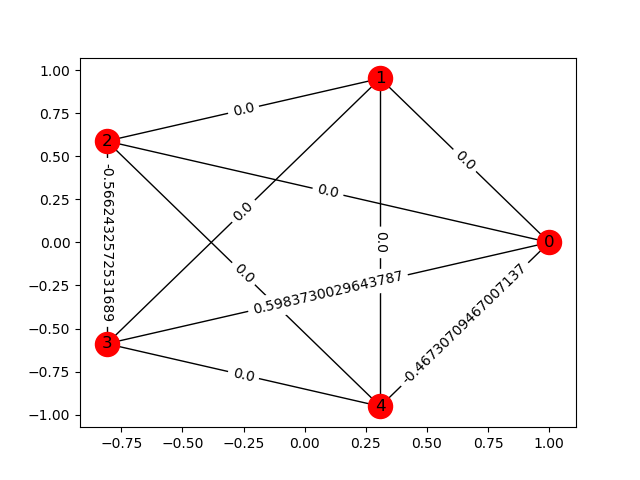

In [301]:
seed=123912
precisions = [sample_precision(5, 0.2, low_edge_prob=0.3, high_edge_prob=0.6, seed=seed+i)
                for i in range(3)]
for prec in precisions:
    G = nx.Graph()
    G.add_nodes_from(np.arange(5))
    k = 0
    for i in range(5):
        for j in range(i+1, 5):
            G.add_edge(i, j, weight=prec[i,j])
            k += 1
    fig, ax = plt.subplots()
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos=pos, ax=ax, with_labels=True)
    nx.draw_networkx_edge_labels(G, pos=pos, ax=ax, edge_labels=nx.get_edge_attributes(G, 'weight'))

In [210]:
import torch

In [227]:
def kl_categorical(preds, log_prior, num_atoms, eps=1e-16):
    kl_div = preds * (torch.log(preds + eps) - log_prior)
    return kl_div.sum() / preds.size(0)#(num_atoms * preds.size(0))

In [233]:
prior = np.array([0.8, 0.1, 0.1])
log_prior = torch.tensor(np.log(prior)).float()
log_prior = log_prior.unsqueeze(0).unsqueeze(0)
print(log_prior)

tensor([[[-0.2231, -2.3026, -2.3026]]])


In [293]:
# Perfect (should have KL 0)
actual = np.tile(np.array([0.4, 0.3, 0.3]), reps=(100, 1))
actual = torch.from_numpy(actual).float()
kl_categorical(actual, log_prior, 10)

tensor(0.3819)

In [260]:
from sklearn.utils.extmath import softmax
actual = np.random.multivariate_normal([5, 0.3, 0.3], cov=np.identity(3)/100, size=100)
actual = softmax(actual)
actual = torch.from_numpy(actual).float()
kl_categorical(actual, log_prior, 1)

tensor(0.1576)

In [289]:
1 * np.exp(-50/20)

0.0820849986238988